# 用户指南，第19章：高级时值（多连音、复杂时值）
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_19_duration2.html)

In [1]:
from music21 import *
n = note.Note('C#4')
n.duration

<music21.duration.Duration 1.0>

In [2]:
d = duration.Duration(4.0)
d

<music21.duration.Duration 4.0>

In [3]:
d = duration.Duration(1.5)
(d.type, d.dots, d.quarterLength)

('quarter', 1, 1.5)

In [4]:
startType = '2048th'
try:
    while True:
        print(startType, end=", ")
        startType = duration.nextLargerType(startType)
except duration.DurationException:
    pass

2048th, 1024th, 512th, 256th, 128th, 64th, 32nd, 16th, eighth, quarter, half, whole, breve, longa, maxima, duplex-maxima, 

In [5]:
for dots in range(12):
    print(dots, duration.Duration(type='quarter', dots=dots))

0 <music21.duration.Duration 1.0>
1 <music21.duration.Duration 1.5>
2 <music21.duration.Duration 1.75>
3 <music21.duration.Duration 1.875>
4 <music21.duration.Duration 1.9375>
5 <music21.duration.Duration 1.96875>
6 <music21.duration.Duration 1.984375>
7 <music21.duration.Duration 1.9921875>
8 <music21.duration.Duration 1.99609375>
9 <music21.duration.Duration 1.998046875>
10 <music21.duration.Duration 1.9990234375>
11 <music21.duration.Duration 1.99951171875>


In [6]:
d = duration.Duration(0.3333333333333)
d

<music21.duration.Duration 1/3>

In [7]:
d.quarterLength

Fraction(1, 3)

In [8]:
float(d.quarterLength)

0.3333333333333333

In [9]:
d.fullName

'Eighth Triplet (1/3 QL)'

In [10]:
(d.type, d.dots)

('eighth', 0)

In [11]:
d.tuplets

(<music21.duration.Tuplet 3/2/eighth>,)

In [12]:
fiveInFour = duration.Tuplet(5, 4)
fiveInFour

<music21.duration.Tuplet 5/4>

In [13]:
fiveInFour.tupletMultiplier()

Fraction(4, 5)

In [14]:
fiveInFour.setDurationType('eighth')

In [15]:
fiveInFour.totalTupletLength()

2.0

In [16]:
fiveInFour.setDurationType('quarter', dots=1)
fiveInFour.totalTupletLength()

6.0

In [17]:
oddTuplet = duration.Tuplet(11, 1)
oddTuplet.durationActual = '16th'
oddTuplet.durationNormal = duration.Duration('quarter', dots=2)
oddTuplet.totalTupletLength()

1.75

In [18]:
oddTuplet.tupletMultiplier()

Fraction(7, 11)

In [19]:
trip = duration.Tuplet(3, 2)
trip.type is None

True

In [20]:
trip.bracket

True

In [21]:
(trip.tupletActualShow, trip.tupletNormalShow)

('number', None)

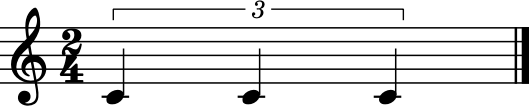

In [22]:
n = note.Note()
n.duration = duration.Duration(2.0/3.0)
n.duration.tuplets[0].tupletNormalShow = 'number'
s = stream.Stream()
s.repeatAppend(n, 3)
s.insert(0, meter.TimeSignature('2/4'))
s.show()

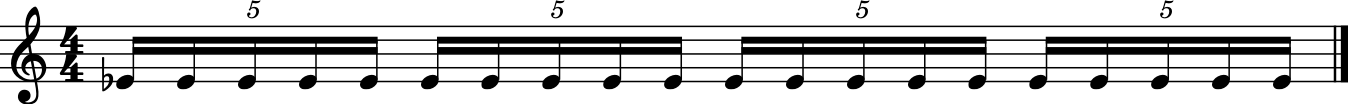

In [23]:
t = duration.Tuplet(5, 4)
t.setDurationType('16th')
d = duration.Duration('16th')
d.appendTuplet(t)
n = note.Note('E-4')
n.duration = d
s = stream.Stream()
s.repeatAppend(n, 20)
s.show()

In [24]:
t.frozen

True

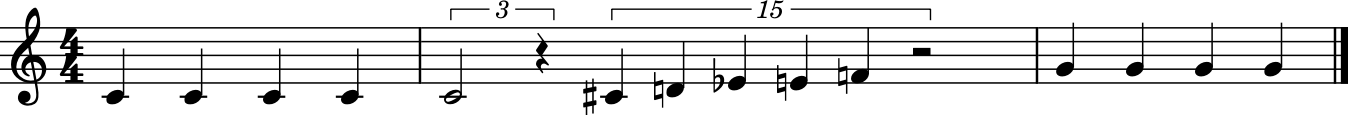

In [25]:
import copy
s = stream.Stream()
s.repeatAppend(note.Note(), 4)

t32h = duration.Tuplet(3, 2, 'half')
t54q = duration.Tuplet(5, 4, 'quarter')
n1 = note.Note()
n1.duration.type = 'half'
n1.duration.appendTuplet(copy.deepcopy(t32h))
s.append(n1)
for i in range(5):
    n = note.Note(61 + i)
    n.duration.type = 'quarter'
    n.duration.appendTuplet(copy.deepcopy(t32h))
    n.duration.appendTuplet(copy.deepcopy(t54q))
    s.append(n)
s.notes[4].duration.tuplets[0].type = 'start'
s.notes[5].duration.tuplets[1].type = 'start'
s.notes[-1].duration.tuplets[0].type = 'stop'
s.notes[-1].duration.tuplets[1].type = 'stop'
s.repeatAppend(note.Note('G4'), 4)
s.show()

In [26]:
s.show('midi')

In [27]:
d = duration.Duration('half')
d.appendTuplet(duration.Tuplet(3, 2))
d.appendTuplet(duration.Tuplet(7, 5))
d.aggregateTupletMultiplier()

Fraction(10, 21)

In [28]:
d = duration.Duration(3.0)
(d.type, d.dots, d.tuplets, d.quarterLength)

('half', 1, (), 3.0)

In [29]:
d.quarterLength *= 4/5
(d.type, d.dots, d.tuplets, d.quarterLength)

('half', 1, (<music21.duration.Tuplet 5/4/half>,), Fraction(12, 5))

In [30]:
d.type = '16th'
d.dots = 2
(d.type, d.dots, d.tuplets, d.quarterLength)

('16th', 2, (<music21.duration.Tuplet 5/4/half>,), Fraction(7, 20))

In [31]:
d = duration.Duration()
d.type = 'half'
d.dots = 1
(d.type, d.dots, d.quarterLength)

('half', 1, 3.0)

In [32]:
d.linked

True

In [33]:
d.linked = False
d.quarterLength = 11/4
(d.type, d.dots, d.quarterLength)

('half', 1, 2.75)

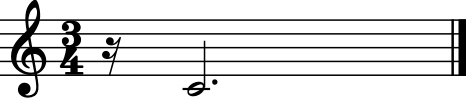

In [34]:
r = note.Rest(type='16th')
n = note.Note()
n.duration = d
s = stream.Stream([meter.TimeSignature('3/4'), r, n])
s.show()

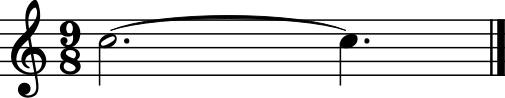

In [35]:
n = note.Note('C5', type='half')
n.duration.dotGroups = (1, 1)
n.show()

In [36]:
k = key.KeySignature(3)
k.duration

<music21.duration.Duration 0.0>

In [37]:
k.duration.type

'zero'

In [38]:
s = stream.Stream()
s.append(meter.TimeSignature('5/4'))
s.append(note.Note('C4', quarterLength=2.25))
s.append(note.Note('C#4', quarterLength=2.75))
s.show('midi')

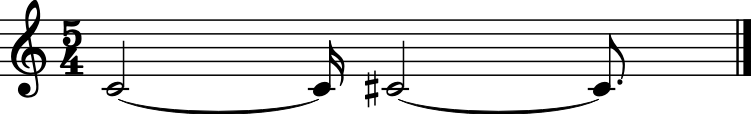

In [39]:
s.show()

In [40]:
oddDuration = duration.Duration()
oddDuration.quarterLength = 2.25

In [41]:
oddDuration.type

'complex'

In [42]:
oddDuration.components

(DurationTuple(type='half', dots=0, quarterLength=2.0),
 DurationTuple(type='16th', dots=0, quarterLength=0.25))

In [43]:
d = duration.Duration(1.0)
d.addDurationTuple(duration.DurationTuple('eighth', 0, 0.5))
d.components

(DurationTuple(type='quarter', dots=0, quarterLength=1.0),
 DurationTuple(type='eighth', dots=0, quarterLength=0.5))

In [44]:
d.type

'complex'

In [45]:
d.consolidate()
(d.type, d.dots, d.quarterLength)

('quarter', 1, 1.5)

In [46]:
d.components

(DurationTuple(type='quarter', dots=1, quarterLength=1.5),)

In [47]:
d = duration.Duration(5.0)
d.consolidate()
d.type

'inexpressible'

In [48]:
d.components

(DurationTuple(type='inexpressible', dots=0, quarterLength=5.0),)

In [49]:
d.quarterLength = d.quarterLength
d.components

(DurationTuple(type='whole', dots=0, quarterLength=4.0),
 DurationTuple(type='quarter', dots=0, quarterLength=1.0))

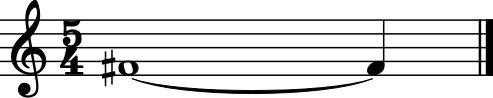

In [50]:
n = note.Note('F#4')
n.duration = d
n.show()

In [51]:
split = n.splitAtDurations()
split

(<music21.note.Note F#>, <music21.note.Note F#>)

In [52]:
[subNote.quarterLength for subNote in split]

[4.0, 1.0]

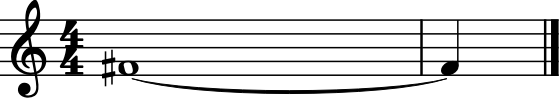

In [53]:
s = stream.Stream()
s.append(split)
s.show()

In [54]:
split[0].tie

<music21.tie.Tie start>

In [55]:
split[1].tie

<music21.tie.Tie stop>

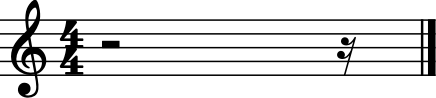

In [56]:
r = note.Rest(quarterLength=2.25)
s = stream.Stream()
s.append(r.splitAtDurations())
s.show()